# Notebook machine learning

In [1]:
import pandas as pd
import numpy as np
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import shap

/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
shap.initjs()

In [3]:
df_original = pd.read_csv("../exploratory/application_ready_for_machine_learning.csv")

In [4]:
df_original

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,TARGET
0,0.083037,0.262949,0.139376,0.0,12.218495,406597.5,9461.0,-637.0,21.6,2.007889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.311267,0.622246,0.626200,0.0,12.506177,1293502.5,16765.0,-1188.0,8.2,4.790750,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.524142,0.555912,0.729567,0.0,11.119883,135000.0,19046.0,-225.0,26.0,2.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.669315,0.650442,0.472277,0.0,11.813030,312682.5,19005.0,-3039.0,9.6,2.316167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.660904,0.322738,0.570941,0.0,11.707670,513000.0,19932.0,-3038.0,17.8,4.222222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.469614,0.488676,0.284054,1.0,11.967181,755190.0,11838.0,-232.0,7.0,4.794857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
99996,0.720055,0.539071,0.576209,1.0,12.323856,284400.0,13429.0,-182.0,17.0,1.264000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
99997,0.473838,0.605584,0.786267,0.0,11.813030,1262583.0,17626.0,-4805.0,16.0,9.352467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
99998,0.398054,0.611289,0.543859,0.0,11.813030,225000.0,12420.0,-340.0,6.0,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [5]:
# Calcul de la matrice de confusion

def plot_confusion_matrix(y_t, y_p): #y_test et y_prédiction
    cm = confusion_matrix(y_t, y_p)

    # Affichage
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Ticks et labels
    classes = np.unique(y_t)
    ax.set(
        xticks=np.arange(len(classes)),
        yticks=np.arange(len(classes)),
        xticklabels=classes,
        yticklabels=classes,
        xlabel='Prédiction',
        ylabel='Vrai label',
        title='Matrice de confusion'
    )

    # Rotation des labels en abscisse
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Annotation des cases
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j, i, format(cm[i, j], 'd'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black'
            )

    plt.tight_layout()
    plt.show()

In [6]:
def plot_courbe_auc(y_t, y_p):
    auc = roc_auc_score(y_t, y_p)
    fpr, tpr, thresholds = roc_curve(y_t, y_p)
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], '--')
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title(f"ROC (AUC = {auc:.3f})")
    plt.show()
    return auc

Je peux mettre le code ci dessous à la fin du notebook exploratoire

In [7]:
#autre méthode : on peut également dropper des NaN

df = df_original.dropna()
df.shape

(100000, 27)

In [8]:
df.sample(5)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,TARGET
7402,0.633710,0.409584,0.604291,0.0,11.813030,161730.0,17290.0,-424.0,18.2,1.198000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1468,0.601359,0.641349,0.535445,0.0,11.967181,943425.0,17805.0,-6245.0,17.4,5.990000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
8254,0.489890,0.457425,0.634706,5.0,12.506177,840951.0,16801.0,-6109.0,20.0,3.114633,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
13479,0.506648,0.671865,0.117614,2.0,12.173033,742500.0,18065.0,-1810.0,22.0,3.837209,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
27619,0.625037,0.746118,0.491865,0.0,11.407565,1057266.0,19586.0,-554.0,12.0,11.747400,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [9]:
df.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,TARGET
0,0.083037,0.262949,0.139376,0.0,12.218495,406597.5,9461.0,-637.0,21.6,2.007889,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.311267,0.622246,0.626200,0.0,12.506177,1293502.5,16765.0,-1188.0,8.2,4.790750,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.524142,0.555912,0.729567,0.0,11.119883,135000.0,19046.0,-225.0,26.0,2.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.669315,0.650442,0.472277,0.0,11.813030,312682.5,19005.0,-3039.0,9.6,2.316167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.660904,0.322738,0.570941,0.0,11.707670,513000.0,19932.0,-3038.0,17.8,4.222222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


### Définition overfitting

Underfitting (sous-apprentissage) : le modèle est trop simple (fort biais), il n’apprend pas la structure des données.

Bon équilibre (biais-variance tradeoff) : le modèle capture la tendance principale sans suivre le bruit.

Overfitting : le modèle devient trop flexible (forte variance), il suit le bruit et perd en pouvoir de prédiction.

### Causes de l'overfitting

Modèle trop complexe : trop de paramètres (haute capacité), p. ex. polynôme de degré élevé, réseau de neurones très profond.

Taille de l’échantillon insuffisante : peu de données d’entraînement par rapport à la complexité du modèle.

Bruitage élevé dans les données : le modèle apprend le bruit plutôt que le signal. 

### Rappel du contexte 

l’entreprise souhaite mettre en œuvre un outil de “scoring crédit” qui calcule la probabilité qu’un client le rembourse ou non, puis classifie la demande : crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification pour aider à décider si un prêt peut être accordé à un client.

Question : quelle est ma target ? Est-ce la variable target ?

In [10]:
df['TARGET'].value_counts()

TARGET
0    91907
1     8093
Name: count, dtype: int64

# Etape 1: Mettre en place un séparation test-train cohérente

In [11]:
y = df['TARGET']

In [12]:
X = df.drop(columns=['TARGET'])

In [13]:
X.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0.083037,0.262949,0.139376,0.0,12.218495,406597.5,9461.0,-637.0,21.6,2.007889,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.311267,0.622246,0.626200,0.0,12.506177,1293502.5,16765.0,-1188.0,8.2,4.790750,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.524142,0.555912,0.729567,0.0,11.119883,135000.0,19046.0,-225.0,26.0,2.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.669315,0.650442,0.472277,0.0,11.813030,312682.5,19005.0,-3039.0,9.6,2.316167,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.660904,0.322738,0.570941,0.0,11.707670,513000.0,19932.0,-3038.0,17.8,4.222222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Oversampling avec SMOTE

In [14]:
X_train_before_oversampling, X_test, y_train_before_oversampling, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

SMOTE (Synthetic Minority Over-sampling Technique) is one of the most widely used methods for dealing with class imbalance in classification problems. Instead of simply duplicating minority‐class samples, SMOTE creates new synthetic examples by interpolating between existing ones.

In [15]:
X_train, y_train = SMOTE(
    #sampling_strategy=0.5,  # minority will be 50% of majority
    sampling_strategy='auto',
    k_neighbors=5, #k_neighbors (par défaut 5)
    random_state=42
).fit_resample(X_train_before_oversampling, y_train_before_oversampling)

print("Before:", Counter(y_train_before_oversampling))
print("After: ", Counter(y_train))

Before: Counter({0: 61554, 1: 5446})
After:  Counter({0: 61554, 1: 61554})


In [16]:
X_train.shape

(123108, 26)

In [17]:
X_test.shape

(33000, 26)

In [18]:
X_train

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0.802384,0.519929,0.843544,0.000000,10.609057,1.078200e+05,23161.000000,-3353.400000,23.800000,2.662222,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
1,0.632665,0.494317,0.427657,1.000000,11.813030,1.350000e+05,11463.000000,-1830.000000,10.200000,1.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000
2,0.535527,0.429552,0.571137,0.000000,11.967181,5.084955e+05,18386.000000,-2049.000000,9.000000,3.228543,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000
3,0.662047,0.693390,0.524496,0.000000,12.323856,1.129500e+06,19872.000000,-10484.000000,11.200000,5.020000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
4,0.665557,0.609099,0.807274,0.000000,11.813030,7.430310e+05,21541.000000,-4040.400000,10.000000,5.503933,...,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123103,0.737138,0.432032,0.682639,0.000000,11.619600,2.419317e+05,23704.956748,-4897.623946,9.145577,2.175447,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
123104,0.293172,0.134845,0.233432,0.000000,12.218495,5.450400e+05,9432.463319,-1071.509497,19.418262,2.691556,...,0.000000,0.0,0.0,0.0,0.057366,0.0,0.000000,0.0,0.0,1.000000
123105,0.564260,0.749000,0.312168,0.691524,12.661489,1.800000e+06,15563.366544,-2705.755900,5.319313,6.158203,...,0.691524,0.0,0.0,0.0,0.308476,0.0,0.691524,0.0,0.0,0.308476
123106,0.165153,0.253094,0.313861,0.000000,11.407565,1.800000e+05,7868.771395,-1004.321645,25.994235,2.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000


In [19]:
y_train.sum()

np.int64(61554)

In [20]:
y_test.sum()

np.int64(2647)

On a fait un split Train Test, maintanent on va entrainer des modèles dessus

# 1. Entrainement des modèles

## A Régressions logistique (Modèles linéaires)

Régression logistique.   
Modèle linéaire qui estime la probabilité d’appartenance à la classe 1 via la fonction log‑it.
Interprétable : chaque coefficient → impact d’une variable sur le log‑odds.
Rapide à entraîner, fonctionne bien si la frontière est (à peu près) linéaire.
Sensibilité aux variables corrélées et aux outliers.

In [21]:
model_logistique = LogisticRegression(random_state=0)

In [22]:
X_train

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CREDIT_DEBT_RATIO,...,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0.802384,0.519929,0.843544,0.000000,10.609057,1.078200e+05,23161.000000,-3353.400000,23.800000,2.662222,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
1,0.632665,0.494317,0.427657,1.000000,11.813030,1.350000e+05,11463.000000,-1830.000000,10.200000,1.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000
2,0.535527,0.429552,0.571137,0.000000,11.967181,5.084955e+05,18386.000000,-2049.000000,9.000000,3.228543,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000
3,0.662047,0.693390,0.524496,0.000000,12.323856,1.129500e+06,19872.000000,-10484.000000,11.200000,5.020000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
4,0.665557,0.609099,0.807274,0.000000,11.813030,7.430310e+05,21541.000000,-4040.400000,10.000000,5.503933,...,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123103,0.737138,0.432032,0.682639,0.000000,11.619600,2.419317e+05,23704.956748,-4897.623946,9.145577,2.175447,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000
123104,0.293172,0.134845,0.233432,0.000000,12.218495,5.450400e+05,9432.463319,-1071.509497,19.418262,2.691556,...,0.000000,0.0,0.0,0.0,0.057366,0.0,0.000000,0.0,0.0,1.000000
123105,0.564260,0.749000,0.312168,0.691524,12.661489,1.800000e+06,15563.366544,-2705.755900,5.319313,6.158203,...,0.691524,0.0,0.0,0.0,0.308476,0.0,0.691524,0.0,0.0,0.308476
123106,0.165153,0.253094,0.313861,0.000000,11.407565,1.800000e+05,7868.771395,-1004.321645,25.994235,2.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000


En se servant du jeu de données d'entraienemtn, on a entrainé le modèle sur le jeu de modèle d'entrainement

In [23]:
model_logistique.fit(X_train, y_train)

/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [24]:
y_pred = model_logistique.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(33000,))

Le modèle est mauvais et ne prédit pas correctement

In [26]:
y_proba = model_logistique.predict_proba(X_test)[:, 1]
y_proba

array([0.47295884, 0.47184787, 0.4661415 , ..., 0.411762  , 0.66792124,
       0.26554585], shape=(33000,))

Text(0.5, 1.0, 'Histogramme de la distribution des probabilités pour le jeu de données test')

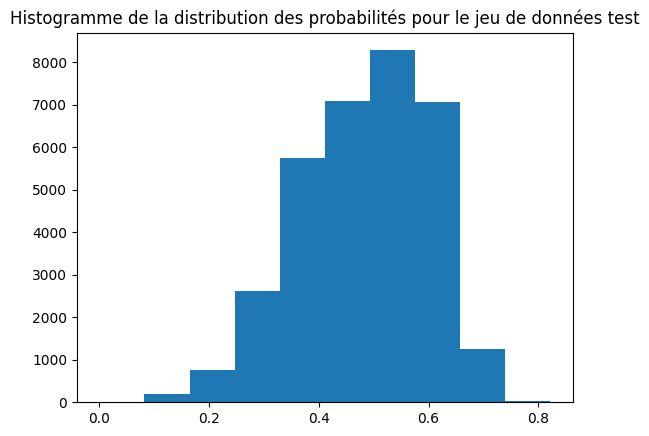

In [27]:
plt.hist(y_proba)
plt.title('Histogramme de la distribution des probabilités pour le jeu de données test')

### Résultats

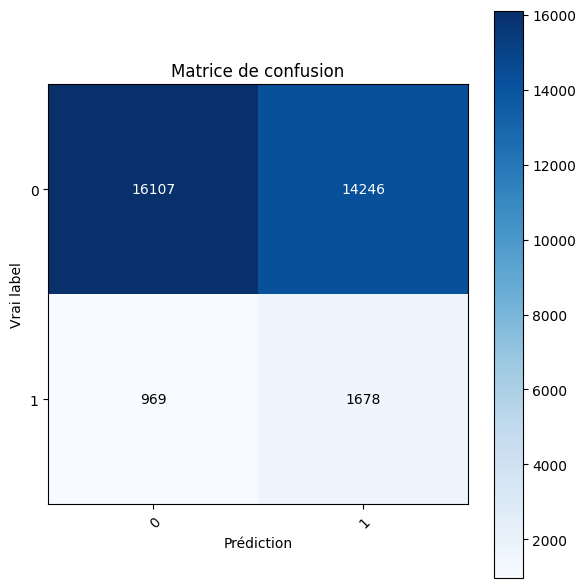

In [28]:
plot_confusion_matrix(y_test, y_pred)

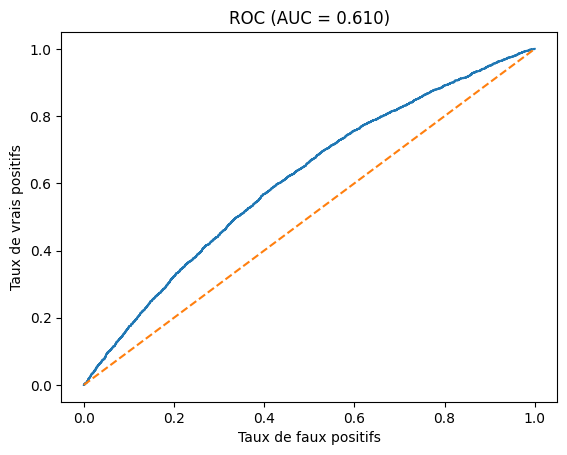

In [29]:
regression_logisitique_auc = plot_courbe_auc(y_test, y_proba)

### Feature importance

La feature importance permet de savoir quelles sont les variables les plus utiles pour faire une prédiction cohérente

In [30]:
# Coefficients and Odds Ratios
coefficients = model_logistique.coef_[0]
odds_ratios = np.exp(coefficients)


# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
                                              Feature   Coefficient  \
4                                    AMT_INCOME_TOTAL  1.066374e-01   
9                                   CREDIT_DEBT_RATIO  3.725354e-02   
25  NAME_EDUCATION_TYPE_Secondary / secondary special  2.451641e-02   
20                           NAME_INCOME_TYPE_Working  2.243625e-02   
13                                      CODE_GENDER_M  1.860473e-02   
3                                        CNT_CHILDREN  9.422661e-03   
8                                         OWN_CAR_AGE  6.801956e-03   
24                NAME_EDUCATION_TYPE_Lower secondary  1.414784e-03   
7                                       DAYS_EMPLOYED  1.342008e-04   
19                        NAME_INCOME_TYPE_Unemployed  1.289560e-04   
21                NAME_EDUCATION_TYPE_Academic degree  9.142052e-07   
5                                          AMT_CREDIT -4.353056e-07   
10                         

L'income total et le crédit debt ratio semblent être les varaibles les plus importantes pour le modèle de régression

### Shap

In [31]:
explainer = shap.Explainer(model_logistique, X_train)
shap_values = explainer(X_test)

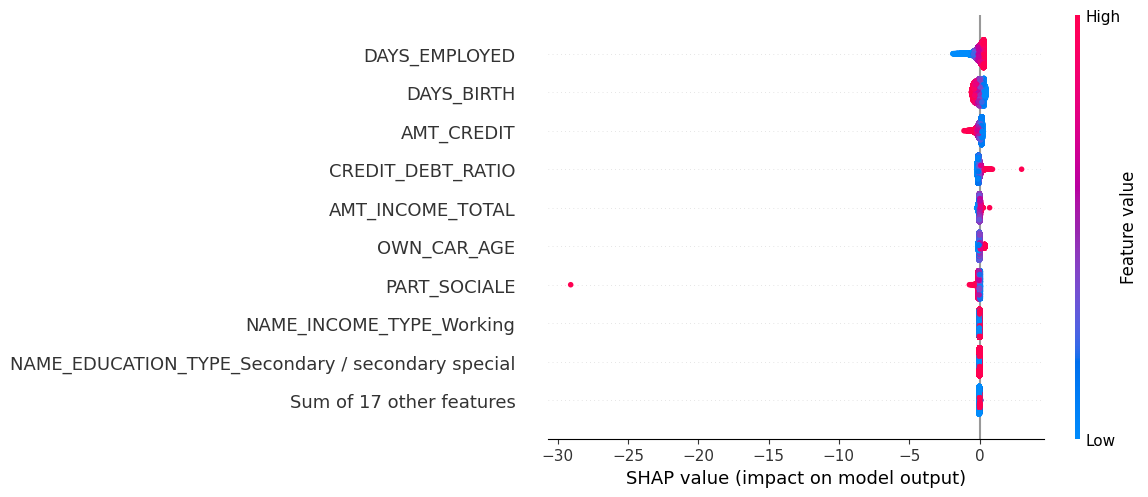

In [32]:
shap.plots.beeswarm(shap_values)

En utilisant l'explainer shap, on voit que les 4 features les plus importantes sont AMT credit, Credit Debt Ratio, Days Birth et Days employed pour le modèle shap.

In [33]:
ind = 0
shap.plots.force(shap_values[ind])

L'index correspond à l'indivu.  
On interprète le graphique de la manière suivante : les variables affichées représentent leur poids dans la décision ou non d'obtention de crédit. Par exemple, on voit ici que Days_Birth est une variable qui impactera positivement l'obtention du crédit, et ce de manière siginificative.  
Le -0.11 est ma valeur donnée par l'algo. Plus c'est bas, plus l'individu va être classifié à 0. 0 correspond à un prêt bancaire accordé. L'avantage de shap est de pouvoir expliquer le modèle pour chaque individu.  

## B : Modèle benchmark (Dummy)

Pourquoi un modèle Dummy :  Si mon modèle de ML n’arrive pas à faire mieux qu’un modèle sans features, c’est que mes features n’apportent pas une grande valeur ajoutée.

In [34]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)

DummyClassifier()

In [35]:
y_pred = dummy_classifier.predict(X_test)
y_proba = dummy_classifier.predict_proba(X_test)[:, 1]

In [36]:
y_pred.sum()

np.int64(0)

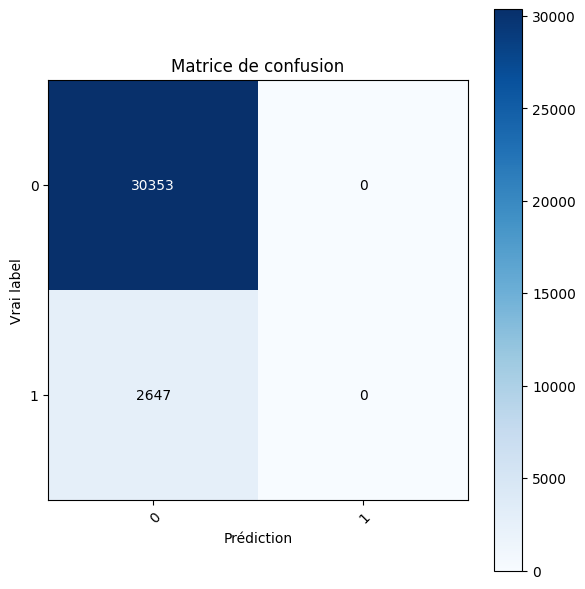

In [37]:
plot_confusion_matrix(y_test, y_pred)

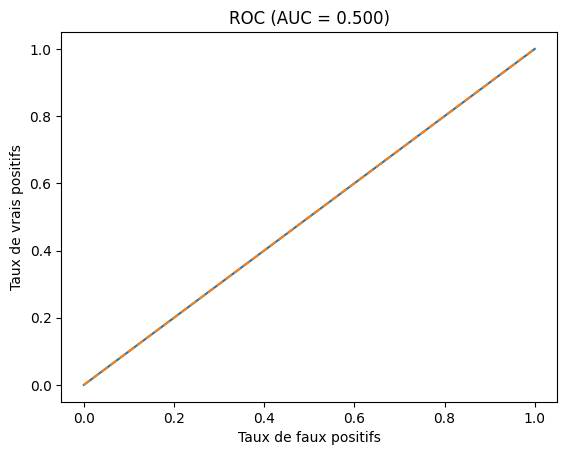

In [38]:
dummy_classifier_auc = plot_courbe_auc(y_test, y_proba)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30353
           1       0.00      0.00      0.00      2647

    accuracy                           0.92     33000
   macro avg       0.46      0.50      0.48     33000
weighted avg       0.85      0.92      0.88     33000



/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-d

Le modèle est très mauvais pour prédire les 1

## C: Decision tree

In [40]:
# 1. Instanciation
model_decisiontree = DecisionTreeClassifier(random_state=0, max_depth=5)  

In [41]:
# 2. Entraînement
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [42]:
# 3. Prédiction
y_pred   = model_decisiontree.predict(X_test)
y_proba  = model_decisiontree.predict_proba(X_test)[:,1]

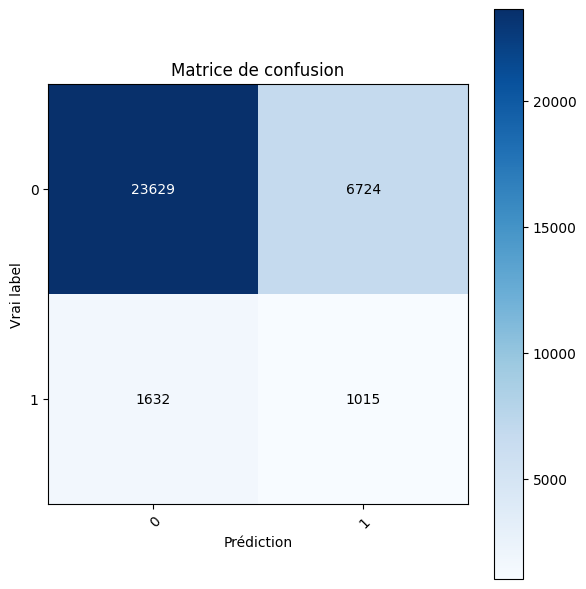

In [43]:
plot_confusion_matrix(y_test, y_pred)

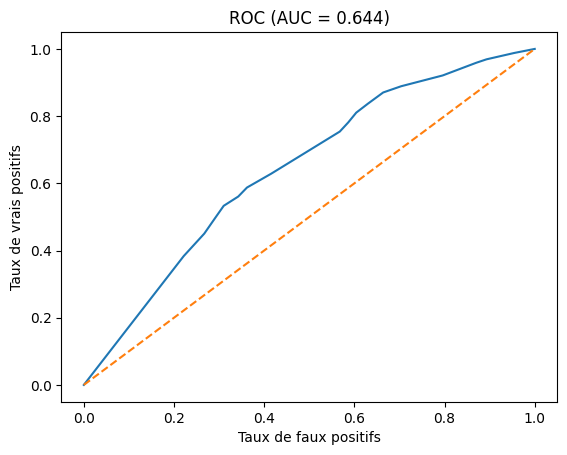

In [44]:
model_decisiontree_auc = plot_courbe_auc(y_test, y_proba)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     30353
           1       0.13      0.38      0.20      2647

    accuracy                           0.75     33000
   macro avg       0.53      0.58      0.52     33000
weighted avg       0.87      0.75      0.80     33000



### Feature importance

A compléter

## D: Random Forest

In [46]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=0,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [47]:
y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:, 1]

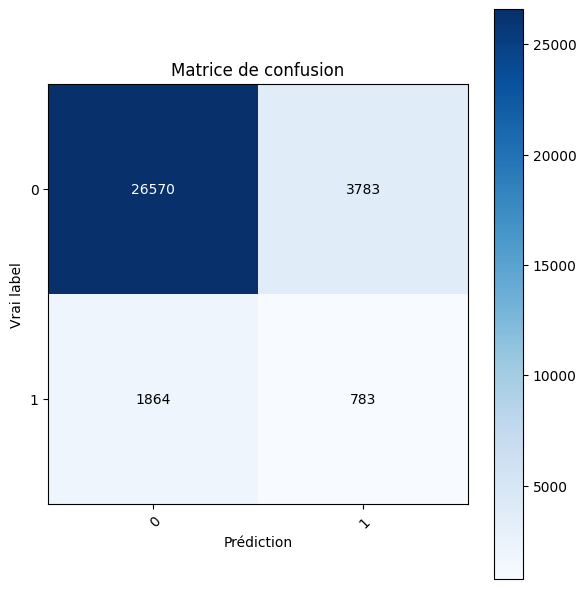

In [48]:
plot_confusion_matrix(y_test, y_pred)

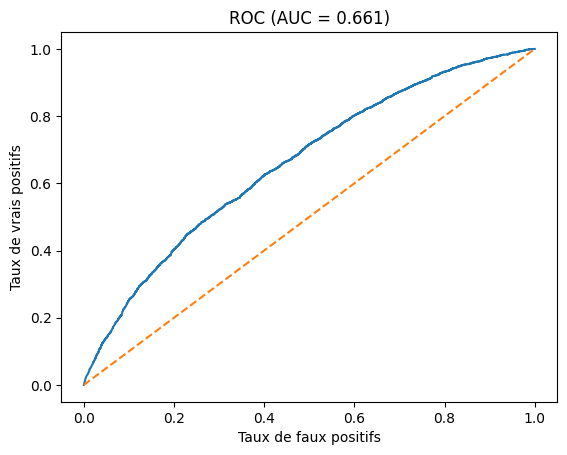

In [49]:
model_rf_auc = plot_courbe_auc(y_test, y_proba)

## E: Gradient boosting

Addition séquentielle d’arbres faibles corrigeant les erreurs des précédents (boosting).  
Très performant sur données tabulaires, mais sensible au bruit et aux hyperparamètres.  
Nécessite souvent un réglage fin (learning rate, n_estimators, max_depth).  
Plus lent à entraîner qu’une random forest.  

In [50]:
model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)

model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
y_pred = model_gb.predict(X_test)
y_proba = model_gb.predict_proba(X_test)[:, 1]

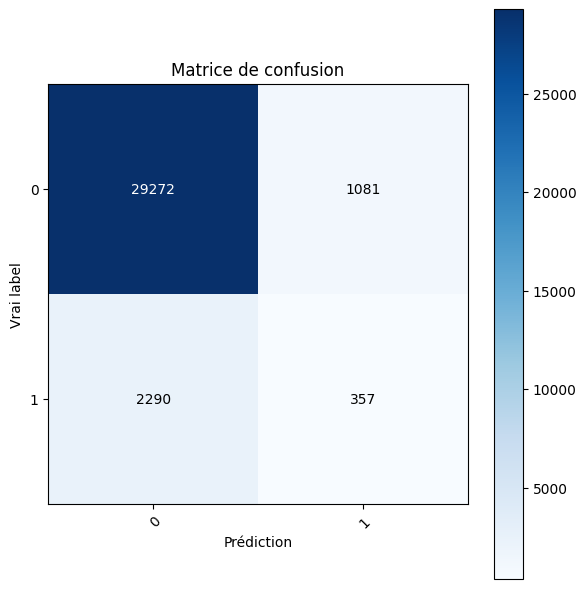

In [52]:
plot_confusion_matrix(y_test, y_pred)

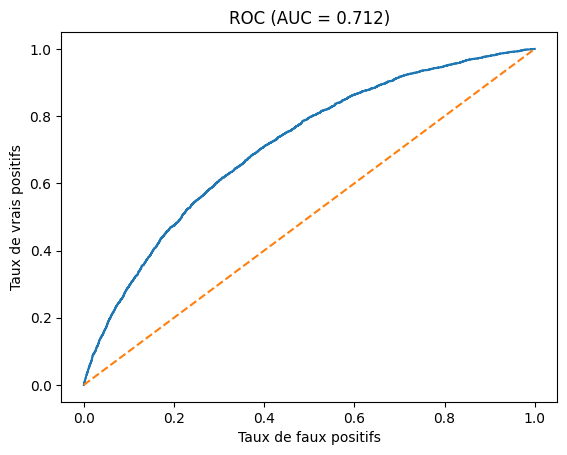

In [53]:
model_gb_auc = plot_courbe_auc(y_test, y_proba)

In [54]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     30353
           1       0.25      0.13      0.17      2647

    accuracy                           0.90     33000
   macro avg       0.59      0.55      0.56     33000
weighted avg       0.87      0.90      0.88     33000



## KNN classifier

Classe un point selon la majorité des k voisins les plus proches dans l’espace des features.  
Simple, non paramétrique, adapté aux frontières complexes.  
Coût de prédiction élevé (recherche de voisins), nécessite normalisation des variables.  
Sensibilité à la dimensionnalité et au choix de k.  

Modèle paramétrique :    
    
A un nombre fixe et prédéfini de paramètres.   
"Résume" les données d'entraînement en un ensemble fini de paramètres.   
Une fois entraîné, on peut jeter les données d'entraînement.   
    
Modèle non paramétrique :    
    
Le nombre de "paramètres" croît avec les données.  
Garde toutes (ou une partie) des données d'entraînement.  
La complexité du modèle s'adapte aux données.  

In [55]:
# On crée un pipeline qui standardise puis applique KNN
model_knn = make_pipeline(
    StandardScaler(),
    #MinMaxScaler(), si je veux que mes données soient dans l'intervalle [0,1] plutôt que centrées-réduites.
    KNeighborsClassifier(n_neighbors=5)
)

In [56]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [57]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [58]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_proba_knn = model_knn.predict_proba(X_test)[:,1]

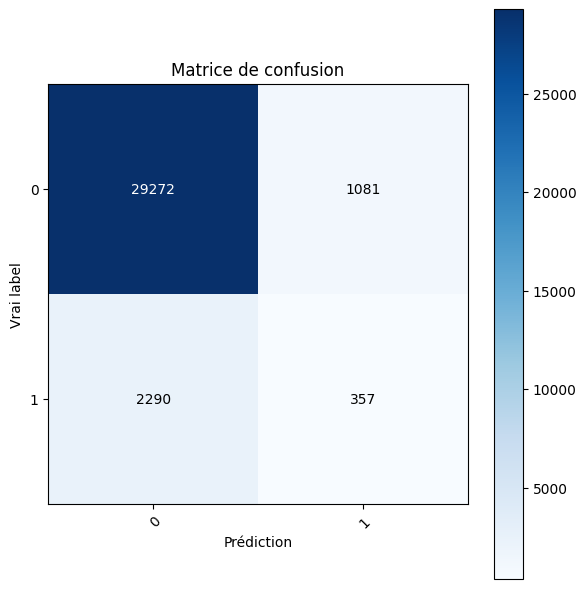

In [60]:
plot_confusion_matrix(y_test, y_pred)

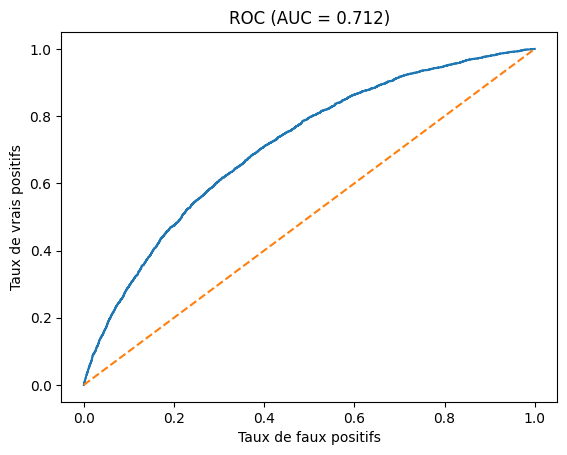

In [61]:
model_knn_auc = plot_courbe_auc(y_test, y_proba)

In [62]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     30353
           1       0.25      0.13      0.17      2647

    accuracy                           0.90     33000
   macro avg       0.59      0.55      0.56     33000
weighted avg       0.87      0.90      0.88     33000



## Support Vector Machine - (ici support vector classifier)

Trouve l’hyperplan maximisant la marge entre classes, peut utiliser des noyaux non linéaires.  
Efficace en haute dimension, robuste aux outliers grâce aux marges souples.  
Choix du noyau et des paramètres (C, gamma) critique, entraînement coûteux sur grands jeux de données.  
Produit des probabilités via calibration si besoin.  

In [63]:
model_svc = make_pipeline(
    StandardScaler(),
    SVC(
        kernel='rbf',
        C=1.0,
        probability=True,
        random_state=0,
        cache_size=500,  # Augmenter le cache (en MB)
        max_iter=1000,   # Limiter les itérations
        tol=1e-2        # Tolérance plus élevée (convergence plus rapide)
    )
)

In [64]:
# 2. Entraînement
model_svc.fit(X_train, y_train)

/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(cache_size=500, max_iter=1000, probability=True,
                     random_state=0, tol=0.01))])

In [65]:
# 3. Prédiction
y_pred   = model_svc.predict(X_test)
y_proba  = model_svc.predict_proba(X_test)[:,1]

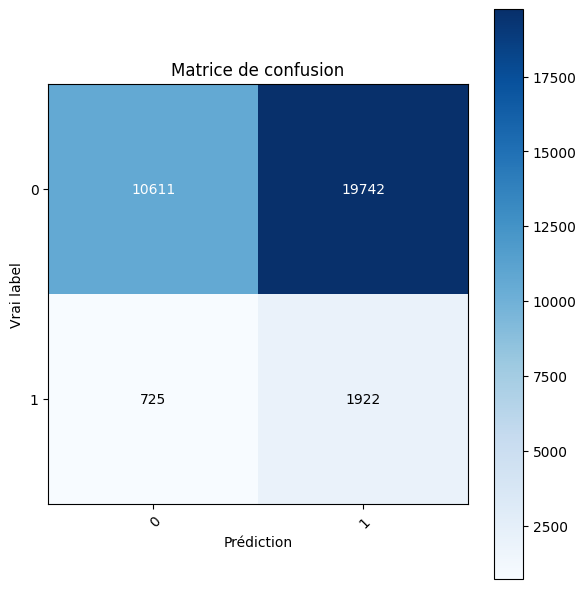

In [66]:
plot_confusion_matrix(y_test, y_pred)

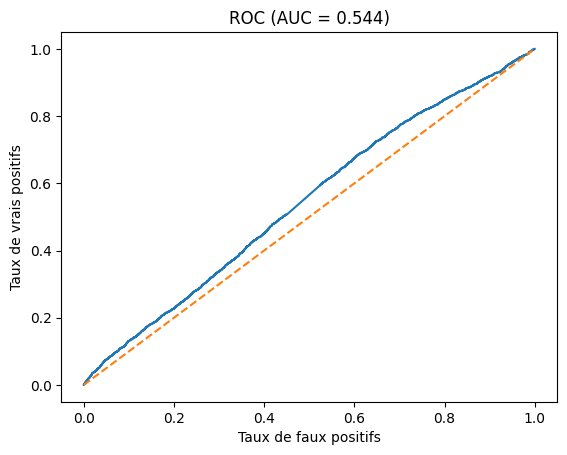

In [67]:
model_decisiontree_auc = plot_courbe_auc(y_test, y_proba)

In [68]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.35      0.51     30353
           1       0.09      0.73      0.16      2647

    accuracy                           0.38     33000
   macro avg       0.51      0.54      0.33     33000
weighted avg       0.87      0.38      0.48     33000



## Multi Layer Perceptron Classifier

Réseau de neurones feed‑forward à une ou plusieurs couches cachées.  
Capable de modéliser des relations non linéaires complexes.  
Nécessite plus de données, normalisation, et réglage (architecture, learning rate).  
Moins interprétable, peut over‑fitter sans régularisation.  

In [69]:
# 1. Instanciation
model_mlp = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=0
)

In [70]:
# 2. Entraînement
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20), random_state=0)

In [71]:
# 3. Prédiction
y_pred   = model_mlp.predict(X_test)
y_proba  = model_mlp.predict_proba(X_test)[:,1]

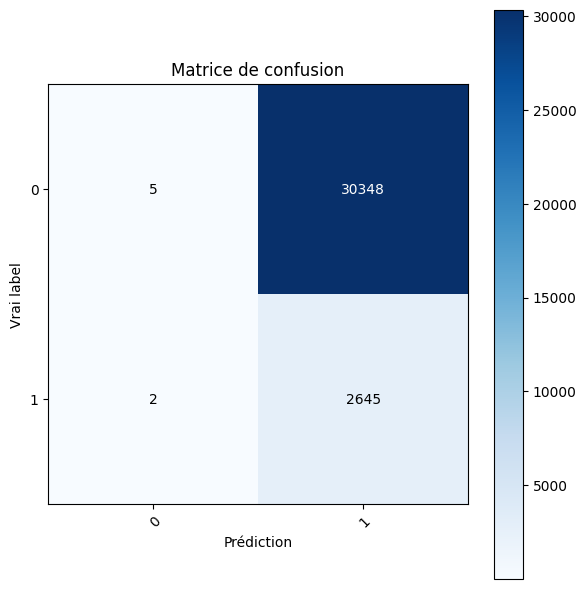

In [72]:
plot_confusion_matrix(y_test, y_pred)

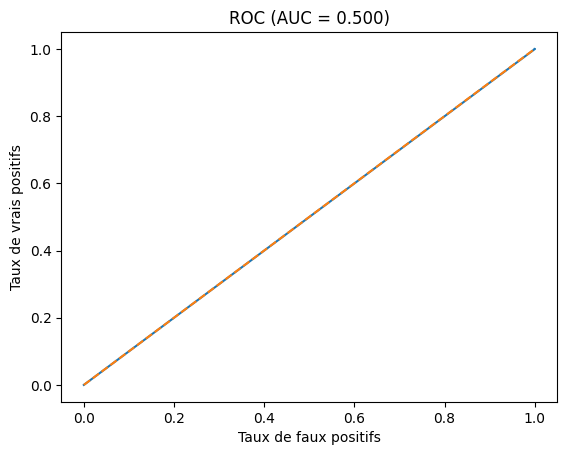

In [73]:
model_mlp_auc = plot_courbe_auc(y_test, y_proba)

# 2. Comparaison des résultats

In [74]:
print('L AUC de la regression logistique est de : ', regression_logisitique_auc)
print('L AUC du dummy classifier est de : ', dummy_classifier_auc)
print('L AUC du Decision Tree est de : ', model_decisiontree_auc)
print('L AUC du Random Forest est de : ', model_rf_auc)
print('L AUC du Gradient Boosting est de : ', model_gb_auc)
print('L AUC du KNN Classifier est de : ', model_knn_auc)
print('L AUC du Support Vector Machine est de : ', model_decisiontree_auc)
print('L AUC du Multi Layer Perceptron Classifier est de : ', model_mlp_auc)


L AUC de la regression logistique est de :  0.6102011153460607
L AUC du dummy classifier est de :  0.5
L AUC du Decision Tree est de :  0.5435954826018906
L AUC du Random Forest est de :  0.660539072354161
L AUC du Gradient Boosting est de :  0.7120649716543375
L AUC du KNN Classifier est de :  0.7120649716543375
L AUC du Support Vector Machine est de :  0.5435954826018906
L AUC du Multi Layer Perceptron Classifier est de :  0.49970456556201914


On part sur le gradient boosting puisqu'il donne les meilleurs résultats.

# 3 - GridSearch

## GridSearch GradientBoosting

In [97]:
# 1. Définir la grille de paramètres pour Gradient Boosting
param_grid_gb = {
    'n_estimators'      : [100, 200],             # nombre d'arbres
    'max_features'      : ['auto', 'sqrt', 'log2']      # nb de features testé à chaque split
}

# 2. Initialiser le GridSearchCV
grid_gb = GridSearchCV(
    estimator   = GradientBoostingClassifier(random_state=42),
    param_grid  = param_grid_gb,
    cv          = 5,
    scoring     = 'accuracy',
    n_jobs      = -1,
    verbose     = 1
)

# 3. Lancer la recherche
grid_gb.fit(X_train, y_train)

# 4. Afficher les meilleurs résultats
print("Meilleur score CV     : ", grid_gb.best_score_)
print("Meilleurs paramètres  : ", grid_gb.best_params_)

# 5. Évaluer sur l'ensemble de test
best_gb = grid_gb.best_estimator_
print("Score sur le test     : ", best_gb.score(X_test, y_test))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/p

Meilleur score CV     :  0.9187014925373134
Meilleurs paramètres  :  {'max_features': 'sqrt', 'n_estimators': 100}
Score sur le test     :  0.9198484848484848


In [99]:
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]

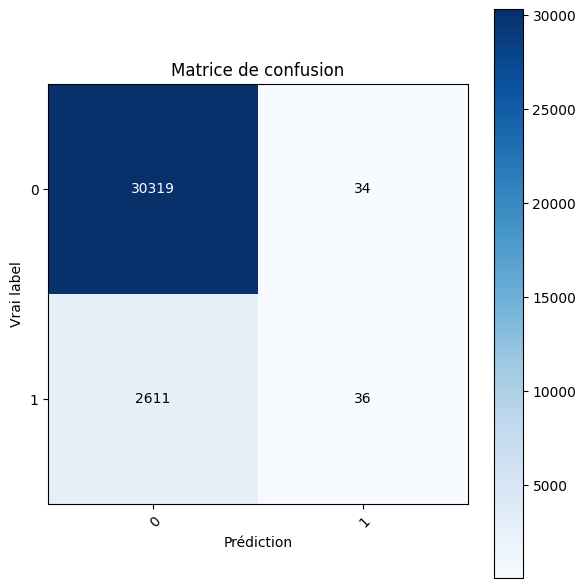

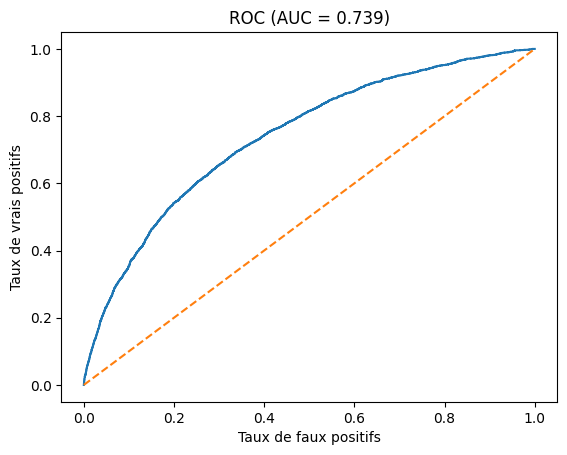

Exception ignored in: <function ResourceTracker.__del__ at 0x1054cff60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1040aff60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versi

In [ ]:
plot_confusion_matrix(y_test, y_pred)
model_gb_auc = plot_courbe_auc(y_test, y_proba)

In [83]:
#template à appliquer sur les autres modèles

param_grid = {'n_neighbors': [1, 5, 10, 20],
              'metric': ['euclidean', 'manhattan']}

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

#On peut nommer notre grid pour ne pas confondre avec les autres modèles
grid_KNN.fit(X_train, y_train)
print(grid_KNN.best_score_)
print(grid_KNN.best_params_)

0.9186417910447762
{'metric': 'manhattan', 'n_neighbors': 20}


In [84]:
print(grid_KNN.best_score_)
print(grid_KNN.best_params_)

0.9186417910447762
{'metric': 'manhattan', 'n_neighbors': 20}


In [85]:
# Récupère le meilleur estimateur (déjà fit grâce à refit=True)
model_KNN = grid_KNN.best_estimator_

print("Test accuracy :", model_KNN.score(X_test, y_test))


Test accuracy : 0.9197878787878788


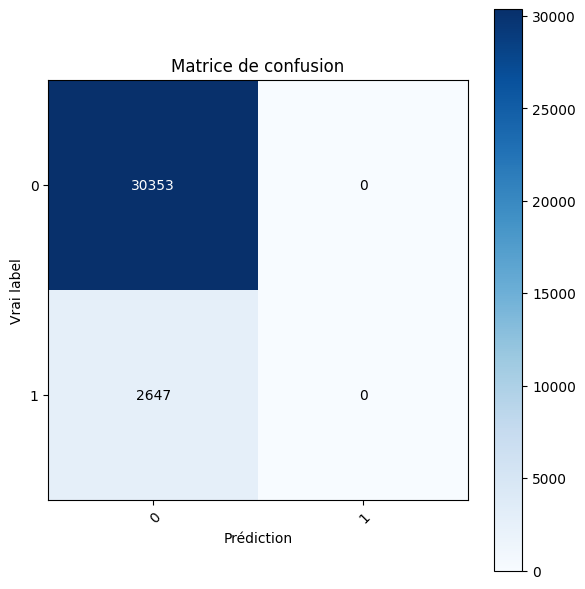

In [86]:
# Calcul de la matrice de confusion
y_pred = model_KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Affichage
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Ticks et labels
classes = np.unique(y_test)
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    xlabel='Prédiction',
    ylabel='Vrai label',
    title='Matrice de confusion'
)

# Rotation des labels en abscisse
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Annotation des cases
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], 'd'),
            ha='center', va='center',
            color='white' if cm[i, j] > thresh else 'black'
        )

plt.tight_layout()
plt.show()

Le modèle est en total sur apprentissage

## GridSearch Decision Tree

In [87]:
# 1. Définir la grille de paramètres à tester
param_grid_dt = {
    'criterion': ['gini', 'entropy'],            # fonction de qualité de scission
    'max_depth': [None] + list(np.arange(2, 21)), # profondeur maximale (None = pas de limite)
    'min_samples_split': np.arange(2, 11),        # nombre min. d'échantillons pour scinder un noeud
    'min_samples_leaf': np.arange(1, 11)          # nombre min. d'échantillons dans une feuille
}

# 2. Initialiser le GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',   # ou une autre métrique si vous préférez
    n_jobs=-1             # utiliser tous les cœurs CPU
)

# 3. Lancer la recherche sur les données d'entraînement
grid_dt.fit(X_train, y_train)

# 4. Examiner les meilleurs résultats
print("Meilleur score CV : ", grid_dt.best_score_)
print("Meilleurs paramètres : ", grid_dt.best_params_)

# 5. Évaluer sur l'ensemble de test
best_dt = grid_dt.best_estimator_
print("Score sur le test   : ", best_dt.score(X_test, y_test))


Meilleur score CV :  0.9187611940298508
Meilleurs paramètres :  {'criterion': 'entropy', 'max_depth': np.int64(4), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}
Score sur le test   :  0.9195757575757576


In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Affichage
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Ticks et labels
classes = np.unique(y_test)
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    xlabel='Prédiction',
    ylabel='Vrai label',
    title='Matrice de confusion'
)

# Rotation des labels en abscisse
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Annotation des cases
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], 'd'),
            ha='center', va='center',
            color='white' if cm[i, j] > thresh else 'black'
        )

plt.tight_layout()
plt.show()


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Exception ignored in: <function ResourceTracker.__del__ at 0x102657f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104c67f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versi

#### Gradient Bossting GridSearchCV

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Affichage
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Ticks et labels
classes = np.unique(y_test)
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    xlabel='Prédiction',
    ylabel='Vrai label',
    title='Matrice de confusion'
)

# Rotation des labels en abscisse
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Annotation des cases
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], 'd'),
            ha='center', va='center',
            color='white' if cm[i, j] > thresh else 'black'
        )

plt.tight_layout()
plt.show()


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Exception ignored in: <function ResourceTracker.__del__ at 0x1077e3f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


#### Multi layer perceptron GridSeachCV

In [95]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# 1. Définir la grille de paramètres pour MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # architectures de couche cachée
    'alpha'             : [0.0001, 0.001, 0.01],                # coefficient de régularisation L2
}

# 2. Initialiser le GridSearchCV pour MLPClassifier
grid_mlp = GridSearchCV(
    estimator = MLPClassifier(random_state=42),
    param_grid = param_grid_mlp,
    cv         = 5,
    scoring    = 'accuracy',
    n_jobs     = -1,
    verbose    = 1
)

# 3. Lancer la recherche
grid_mlp.fit(X_train, y_train)

# 4. Afficher les meilleurs résultats
print("Meilleur score CV     : ", grid_mlp.best_score_)
print("Meilleurs paramètres  : ", grid_mlp.best_params_)

# 5. Évaluer sur l'ensemble de test
best_mlp = grid_mlp.best_estimator_
print("Score sur le test     : ", best_mlp.score(X_test, y_test))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleur score CV     :  0.9187164179104478
Meilleurs paramètres  :  {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Score sur le test     :  0.9197878787878788


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Affichage
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Ticks et labels
classes = np.unique(y_test)
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    xlabel='Prédiction',
    ylabel='Vrai label',
    title='Matrice de confusion'
)

# Rotation des labels en abscisse
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Annotation des cases
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], 'd'),
            ha='center', va='center',
            color='white' if cm[i, j] > thresh else 'black'
        )

plt.tight_layout()
plt.show()


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Exception ignored in: <function ResourceTracker.__del__ at 0x102fe3f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1077e3f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versi

# 4 - Imbalance classification

equilibrage des classes:


only sur le jeu de donnen train

Après avoir fait mon Xtest ytest

Imbalanced Classification
En apprentissage supervisé, on parle de classification déséquilibrée dès lors que les effectifs (instances) des différentes classes sont très inégaux :

Une classe majoritaire domine

Les classes minoritaire(s) n’apparaissent que rarement

Pourquoi c’est un problème
Biais vers la classe majoritaire
Un modèle cherchant à minimiser l’erreur globale peut atteindre de très bons scores (ex. 98 % de précision) en prédisant systématiquement la classe majoritaire, au détriment de la détection des cas rares.

Métriques trompeuses
La simple précision globale n’est plus suffisante. Il faut se tourner vers des métriques plus adaptées :

Rappel (Recall) / Sensibilité
Capacité à détecter tous les exemples d’une classe minoritaire.

Précision (Precision)
Proportion de prédictions positives correctes.

F1-score
Moyenne harmonique de précision et rappel.

AUC-ROC vs AUC-PR
La courbe PR (Precision-Recall) est souvent plus informative en cas de fort déséquilibre.

Origines courantes de déséquilibre
Détection de fraude
Fraudes ≪ transactions légitimes

Diagnostic médical
Maladies rares

Maintenance prédictive
Pannes peu fréquentes

Analyse de churn
Peu de clients quittent

Techniques de remédiation
1. Rééchantillonnage
Oversampling (sur-échantillonnage)
Duplique ou génère des exemples synthétiques (ex. SMOTE) pour la classe minoritaire.

Undersampling (sous-échantillonnage)
Retire des exemples de la classe majoritaire.

2. Coûts et pondérations
Coût différencié des erreurs
On pénalise davantage une fausse prédiction sur la classe rare.

class_weight="balanced"
Pondération automatique dans de nombreux estimateurs (scikit-learn, etc.).

3. Algorithmes spécifiques
Ensembles adaptés
Balanced Random Forest, EasyEnsemble.

Meta-learners Boosting
AdaCost, RUSBoost.

4. Évaluation adaptée
Validation croisée stratifiée
Conserve la même proportion de classes dans chaque fold.

Seuil de décision optimisé
Ajusté selon la courbe ROC ou PR (pas forcément 0,5).



Regarder le grid search CV (recherche automatique des hyper paramètres). On se limitera ici à 3 ou 4 paramètres

conclusion: best model, feature importance (SHAP), plot la matrice de confusion à jour sur tous les modèles

Clean le notebook. 

Répondre à la question du projet

Quand je fais les slides, bien inclure les modèles et les explications sur les modèles.
Expliquer ce qu'est chaque modèle
Expliquer les paramètres important sur le grid search, sur SMOT Imbalance classification
Anticiper les questions qu'ils peuvent me poser
Finir et expliquer SHAP

In [102]:
# 2. Supposons que vous avez X (features) et y (target)
# Vérifier le déséquilibre initial
print("Distribution avant SMOTE:", Counter(y))

# 3. Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérifier la nouvelle distribution
print("Distribution après SMOTE:", Counter(y_train_resampled))

Distribution avant SMOTE: Counter({0: 91907, 1: 8093})
Distribution après SMOTE: Counter({0: 61554, 1: 61554})


In [104]:
# 1. Définir la grille de paramètres pour Gradient Boosting
param_grid_gb = {
    'n_estimators'      : [80, 100, 200],             # nombre d'arbres
    'max_features'      : ['auto', 'sqrt']      # nb de features testé à chaque split
}

# 2. Initialiser le GridSearchCV
grid_gb = GridSearchCV(
    estimator   = GradientBoostingClassifier(random_state=42),
    param_grid  = param_grid_gb,
    cv          = 3,
    scoring     = 'accuracy',
    n_jobs      = -1,
    verbose     = 1
)

# 3. Lancer la recherche
grid_gb.fit(X_train_resampled, y_train_resampled)

# 4. Afficher les meilleurs résultats
print("Meilleur score CV     : ", grid_gb.best_score_)
print("Meilleurs paramètres  : ", grid_gb.best_params_)

# 5. Évaluer sur l'ensemble de test
best_gb_resampled = grid_gb.best_estimator_
print("Score sur le test resampled    : ", best_gb_resampled.score(X_test, y_test))


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jean-baptistevayssade/Documents/OC_Inge_IA/Projet_4_modele_de_scoring/.venv_projet_4/lib/py

Meilleur score CV     :  0.9013549078857589
Meilleurs paramètres  :  {'max_features': 'sqrt', 'n_estimators': 200}
Score sur le test resampled    :  0.8990606060606061


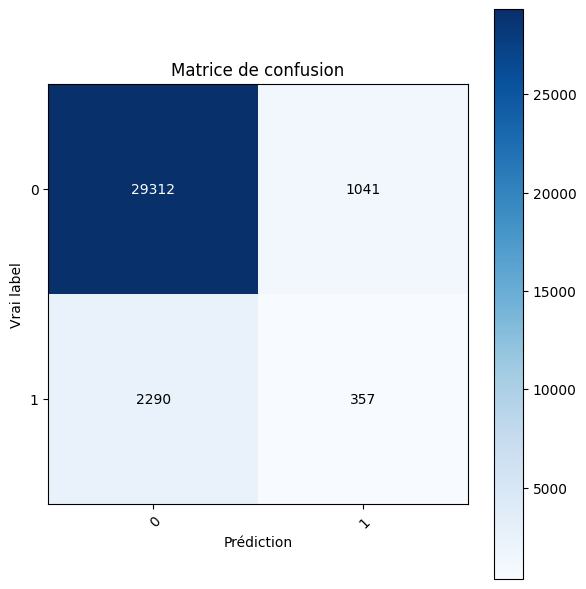

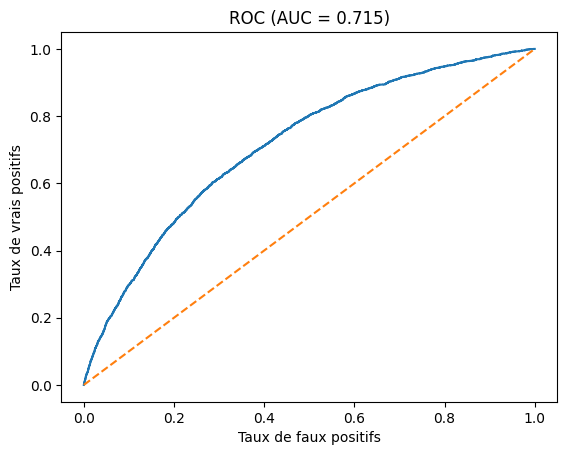

In [106]:
y_pred = best_gb_resampled.predict(X_test)
y_proba = best_gb_resampled.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred)
model_gb_auc = plot_courbe_auc(y_test, y_proba)

Parler du F1 score et du taux de positif.

In [107]:
from sklearn.metrics import classification_report

# Rapport complet avec precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30353
           1       0.26      0.13      0.18      2647

    accuracy                           0.90     33000
   macro avg       0.59      0.55      0.56     33000
weighted avg       0.87      0.90      0.88     33000



Exception ignored in: <function ResourceTracker.__del__ at 0x106957f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102b67f60>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versi

# 5 - Analyse des résultats avec Shap

In [108]:
# 2. Créer l'explainer SHAP
# Pour sklearn GradientBoosting
explainer = shap.TreeExplainer(best_gb_resampled)

# 3. Calculer les valeurs SHAP
shap_values = explainer.shap_values(X_test)

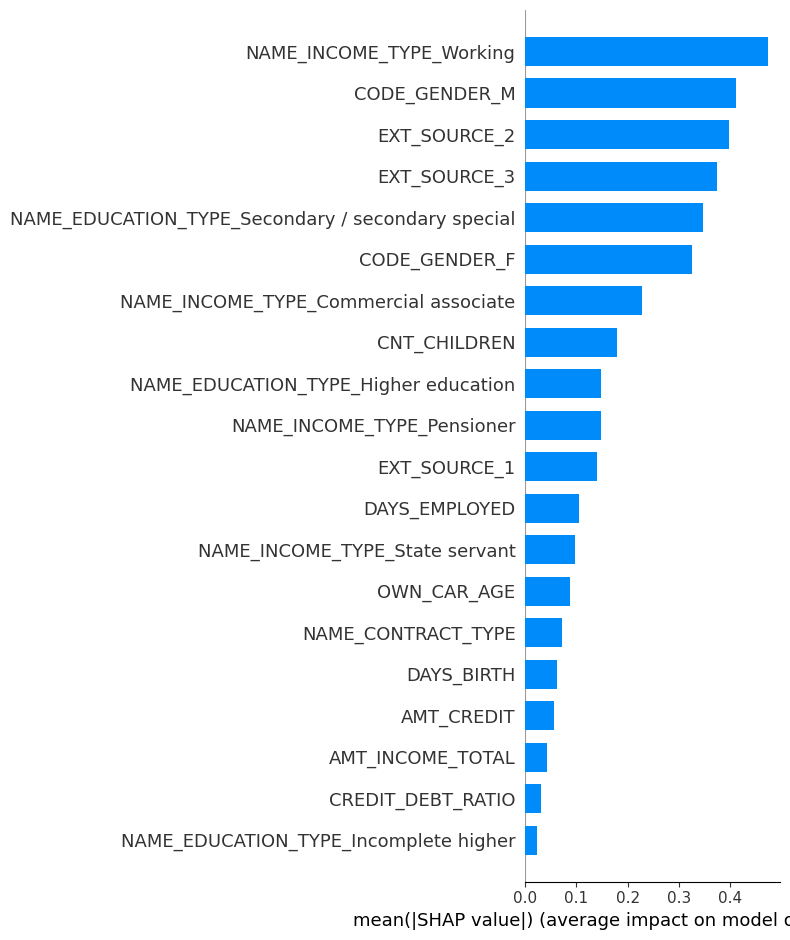

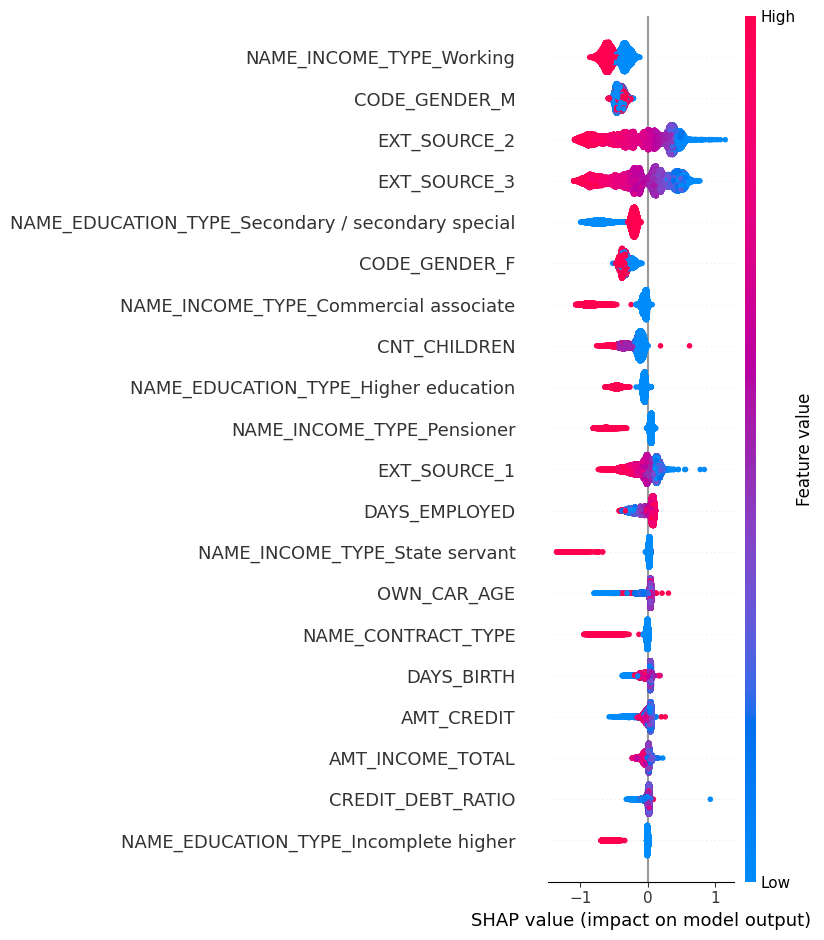

In [109]:
# Vue globale de l'importance des features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Summary plot détaillé (montre l'impact des valeurs)
shap.summary_plot(shap_values, X_test)

Si on prend  feature name income type working, si la couleur est rouge cela veut dire que l'indifvidu travaille. Et d'après le diagramme, pour la valeur rouges aossicée à income type working, la shap value va être négative signifiant que la prédiction du modèle sera plus petite et donc plus proche de 0. Et donc davantage de chances de rembourser le crédit. 

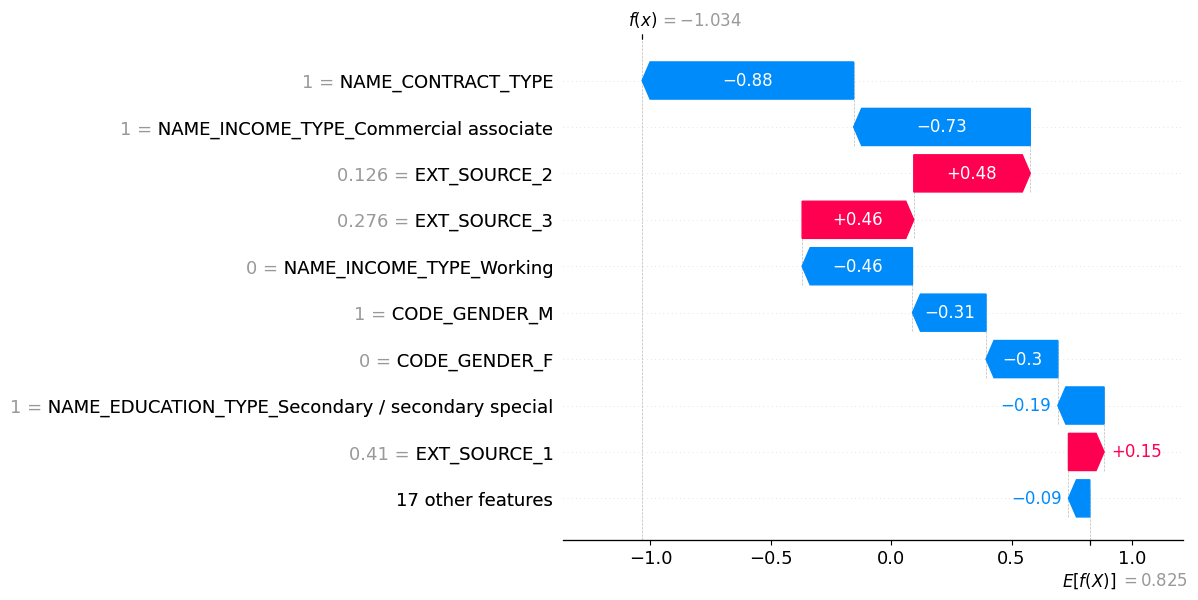

In [113]:
# Utiliser :
shap_values = explainer(X_test)  # Retourne un objet Explanation

# Maintenant le waterfall plot fonctionne
shap.plots.waterfall(shap_values[10])

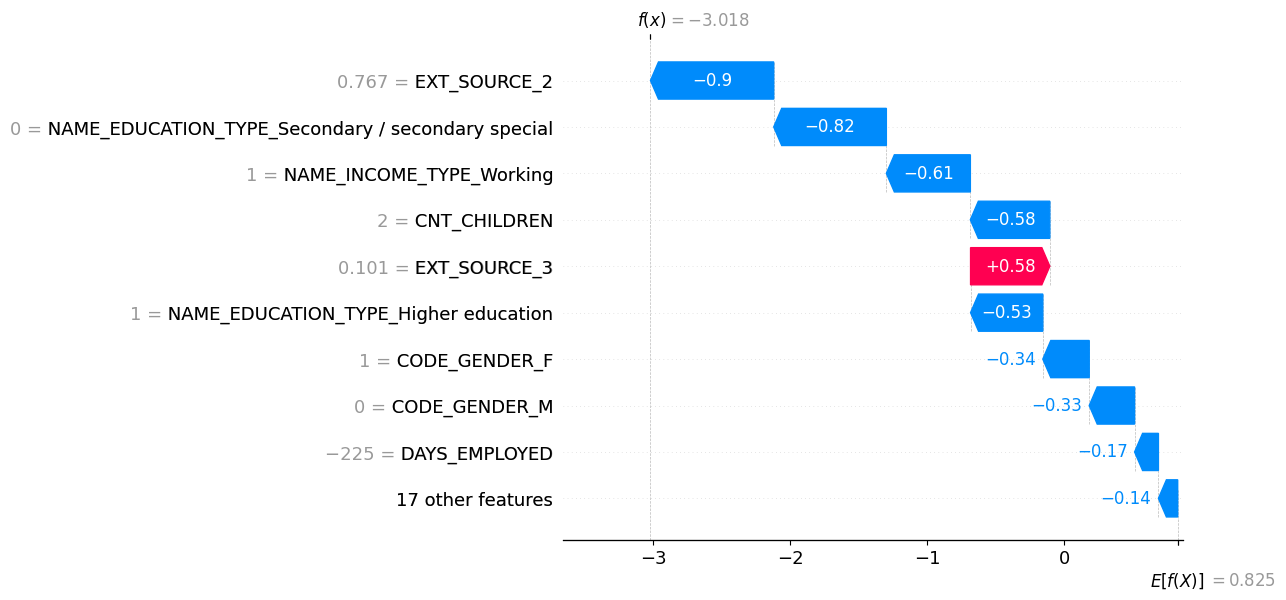

In [114]:
shap.plots.waterfall(shap_values[50])